In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# plotting defaults
plt.rc('figure', figsize=(10, 5))
# plt.rc('font', size=12)

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import acquire as a 
import prepare as p

In [21]:
df = pd.read_csv('ts_superstore.csv')

In [22]:
df = p.process_dataframe(df)

In [26]:
df = df.drop(columns=['Unnamed: 0'])

In [28]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0,January,Tue,10.92
2013-01-01,20,36.0,352419,4,Usda Produce,20,Plums Black,5.62,2.040400e+11,2.040400e+11,516 S Flores St,San Antonio,4.0,TX,78204.0,January,Tue,202.32
2013-01-01,21,23.0,370679,4,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,7.539500e+11,7.539500e+11,516 S Flores St,San Antonio,4.0,TX,78204.0,January,Tue,186.07
2013-01-01,31,30.0,547801,1,Zhenas Gypsy Tea,31,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,6.527901e+11,6.527901e+11,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0,January,Tue,126.30
2013-01-01,22,44.0,388939,4,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,1.600029e+10,1.600029e+10,516 S Flores St,San Antonio,4.0,TX,78204.0,January,Tue,321.64


In [29]:
df.resample('D').mean()

,item,sale_amount,sale_id,store,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,sales_total
sale_date,,,,,,,,,,,
2013-01-01,24.155251,29.511416,425950.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,159.323881
2013-01-02,24.155251,29.178082,425951.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,157.028174
2013-01-03,24.155251,31.063927,425952.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,167.930183
2013-01-04,24.155251,33.593607,425953.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,181.720137
2013-01-05,24.155251,34.575342,425954.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,186.432740
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,24.178899,44.032110,428184.623853,2.706422,24.178899,5.123486,2.385043e+11,2.385043e+11,2.706422,78226.486239,234.639450
2017-12-28,24.178899,46.844037,428185.623853,2.706422,24.178899,5.123486,2.385043e+11,2.385043e+11,2.706422,78226.486239,250.650229
2017-12-29,24.178899,50.146789,428186.623853,2.706422,24.178899,5.123486,2.385043e+11,2.385043e+11,2.706422,78226.486239,269.960229


# Split

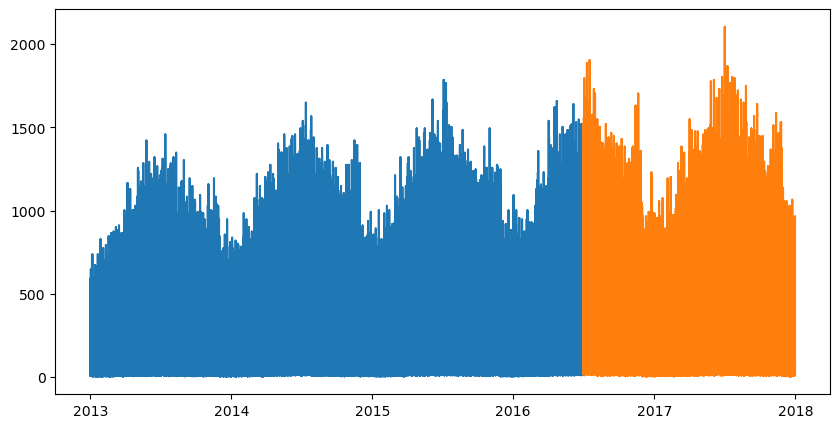

In [31]:
# percentage-Based
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [36]:
# distribution of target variable
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    202.32
2013-01-01    186.07
2013-01-01    126.30
2013-01-01    321.64
Name: sales_total, dtype: float64

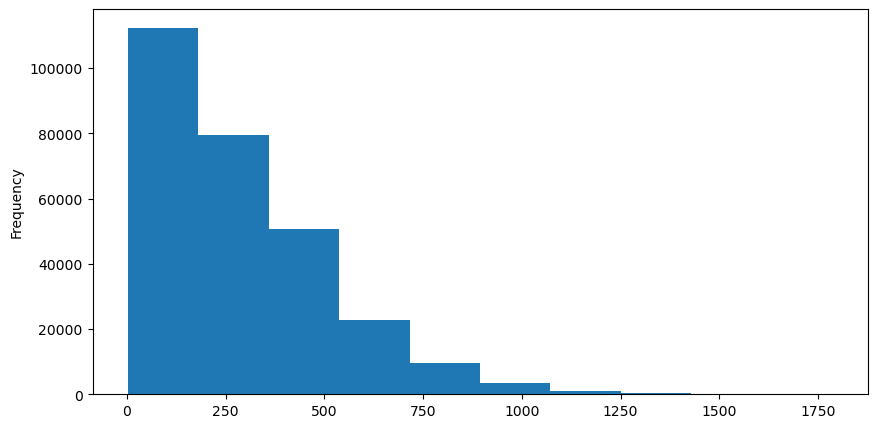

In [37]:
y.plot.hist();

[Text(0.5, 1.0, 'Average Sales Total by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales Amount')]

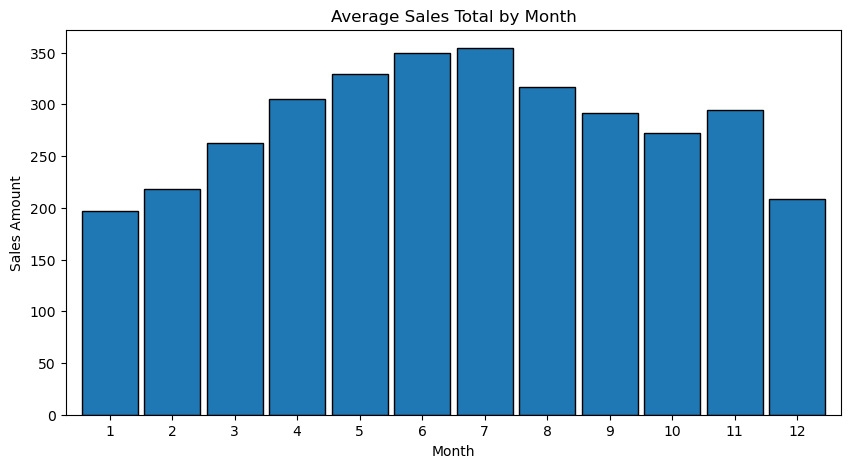

In [40]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='Sales Amount')

[Text(0.5, 1.0, 'Average Sales Total by Weekday'),
 Text(0.5, 24.0, 'Weekday'),
 Text(23.999999999999993, 0.5, 'Sales Amount')]

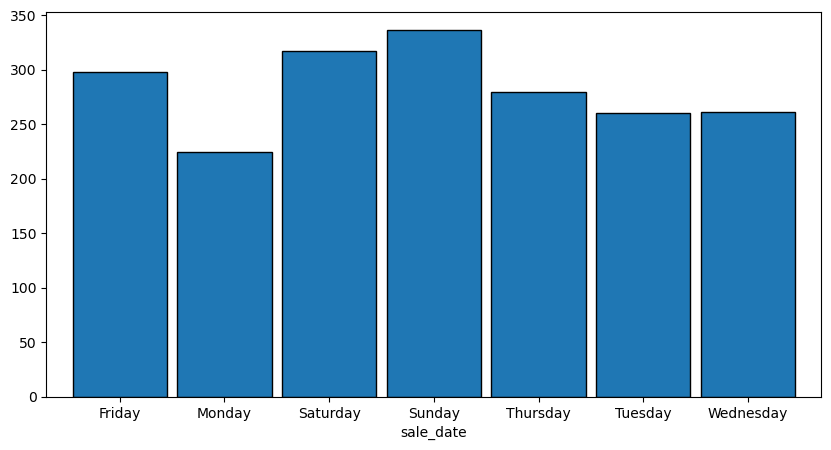

In [48]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Weekday', xlabel='Weekday', ylabel='Sales Amount')


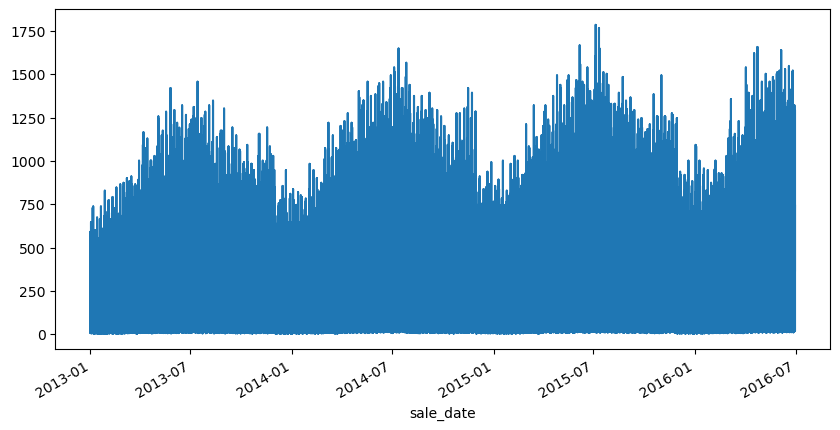

In [45]:
y.plot();

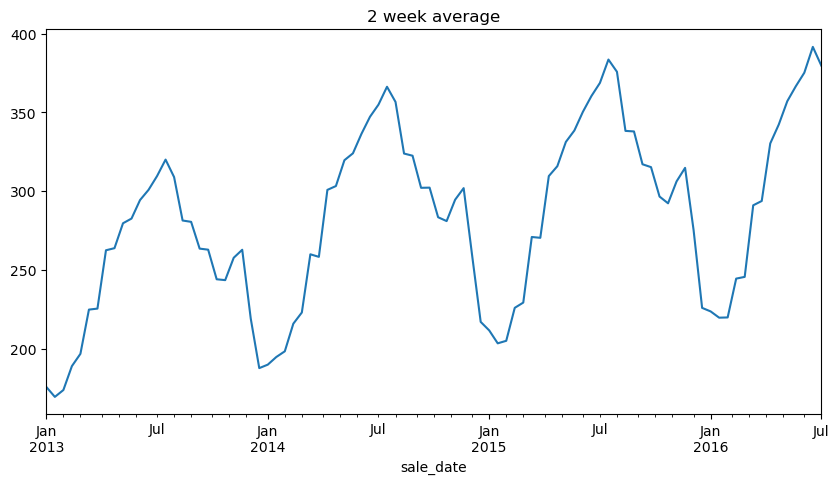

In [54]:
# resample our data over 2 weeks
y.resample('2W').mean().plot(title='2 week average');


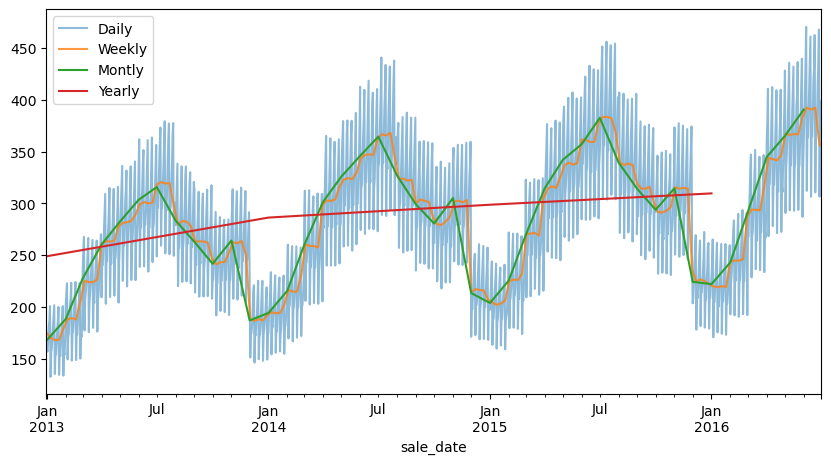

In [57]:

y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();


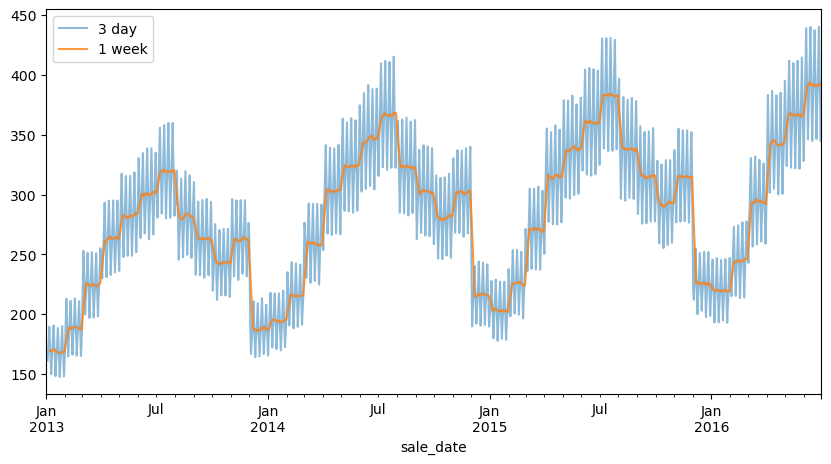

In [59]:

y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()


<AxesSubplot:title={'center':'Average week-to-week change in sales total'}, xlabel='sale_date'>

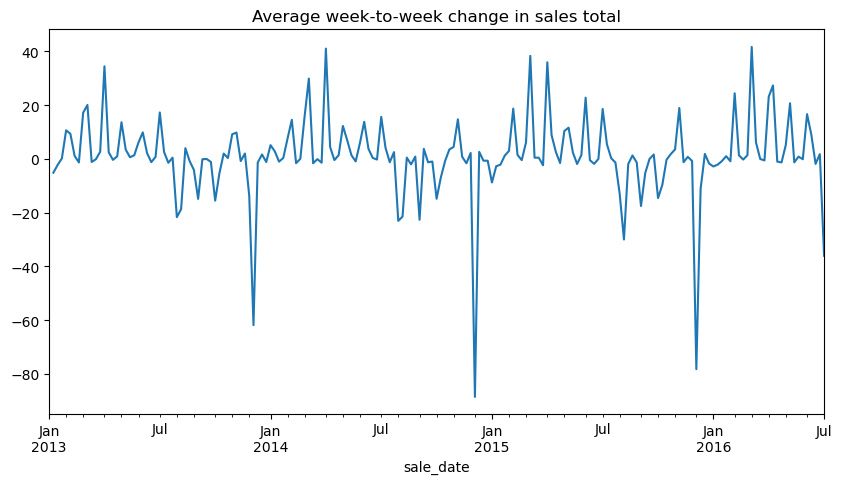

In [60]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales total')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

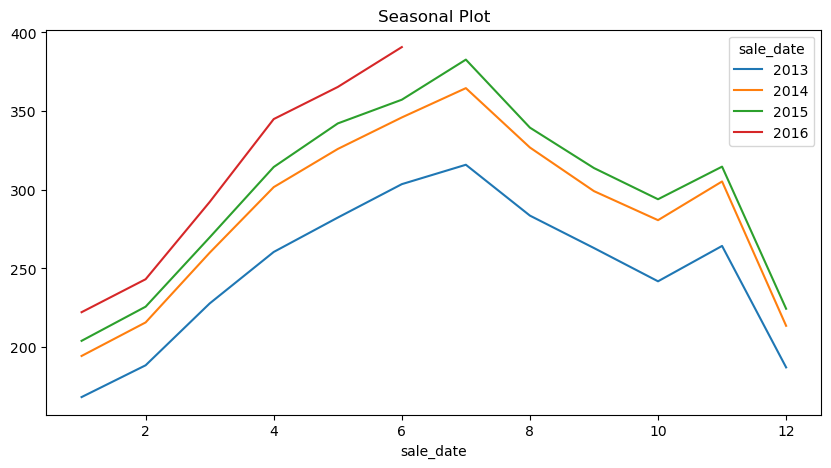

In [62]:
# seasonal Plots 
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


# Seasonal Subseries Plot

/var/folders/bf/lhpb5n_j1xj4msxy6nrm9h7h0000gn/T/ipykernel_32833/4061043374.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)


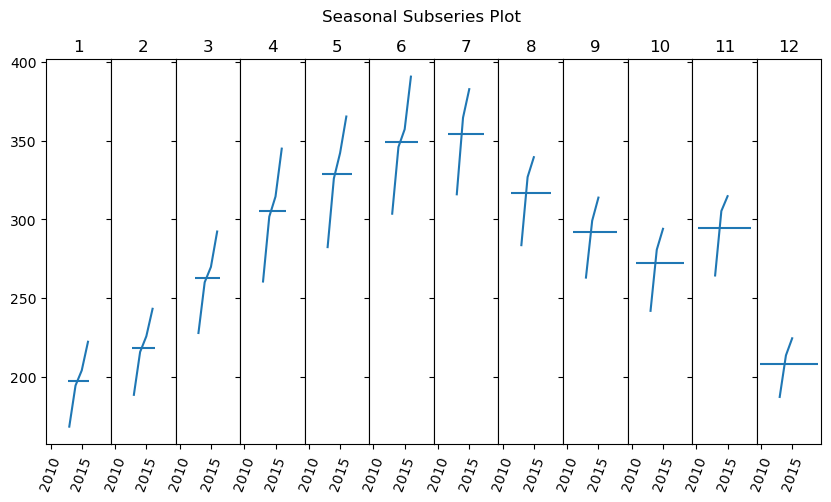

In [64]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


# Lag

Text(0.5, 1.0, 'Lag plot with lag=1')

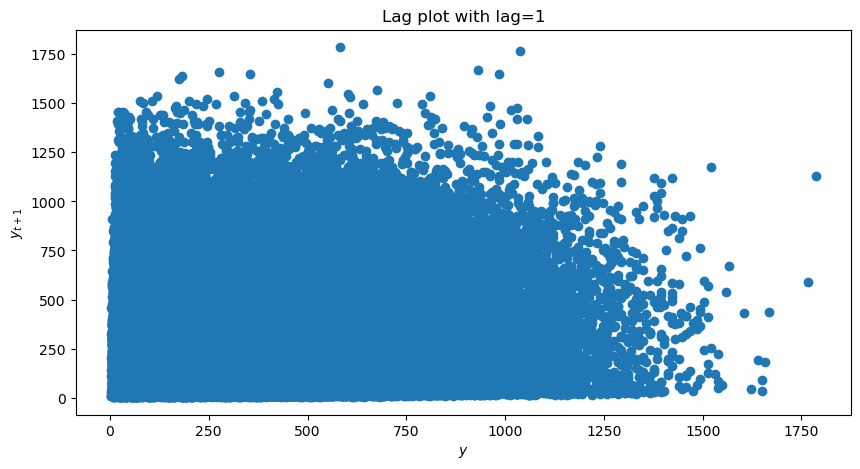

In [65]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

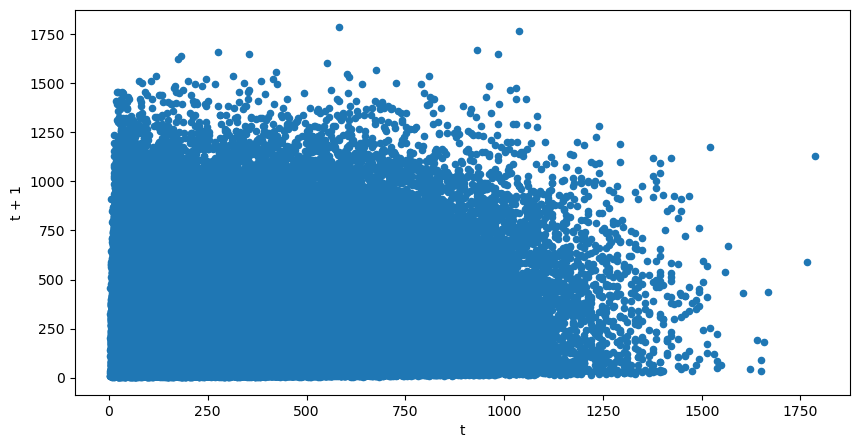

In [76]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


,item,sale_amount,sale_id,store,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,this_week,y(t + 1),the_next_week
sale_date,,,,,,,,,,,,,
2013-01-06,24.155251,32.581431,425953.436073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,175.577032,175.694962,170.427025
2013-01-13,24.155251,31.729941,425959.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,170.427025,170.429400,168.156151
2013-01-20,24.155251,31.399217,425966.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,168.156151,168.218611,168.325721
2013-01-27,24.155251,31.489889,425973.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,168.325721,168.266327,178.964527
2013-02-03,24.155251,33.395303,425980.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,178.964527,179.071624,188.286438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,24.155251,71.726680,427198.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,383.433581,383.587299,392.460104
2016-06-12,24.155251,72.990215,427205.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,392.460104,392.205036,390.585675
2016-06-19,24.155251,72.846706,427212.936073,2.716895,24.155251,5.103470,2.376048e+11,2.376048e+11,2.716895,78226.447489,390.585675,390.523170,392.356784


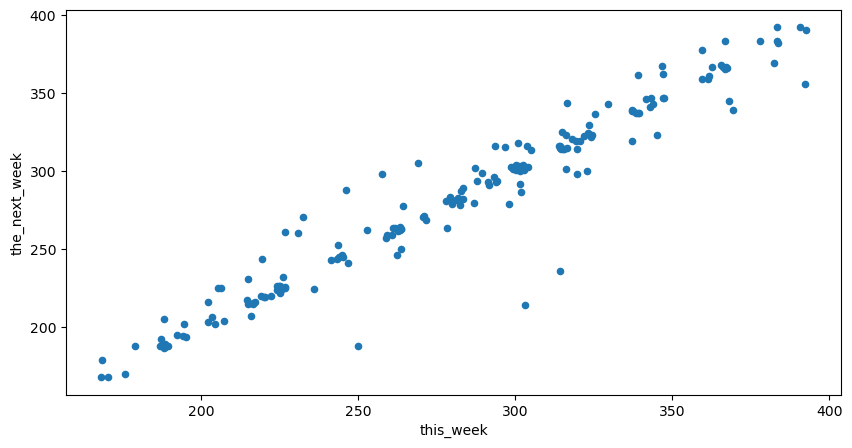

In [77]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly


# Autocorrelation Plot

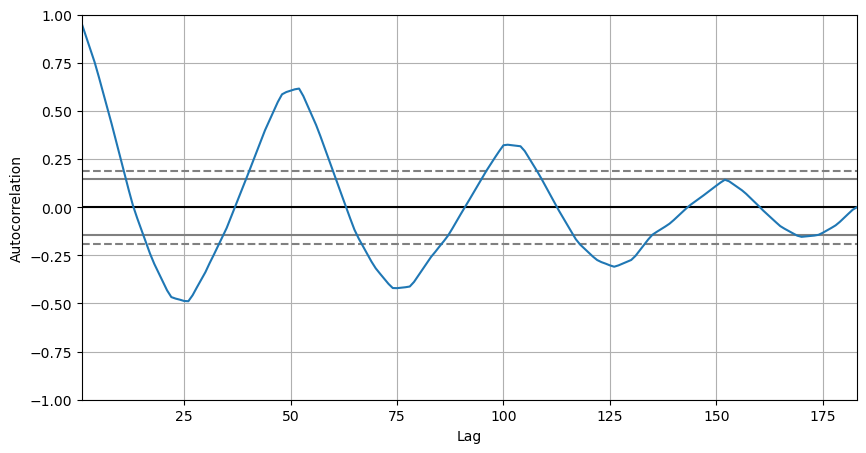

In [78]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean());


# Seasonal Decomposition

In [79]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,175.577032,NaN,-82.580310,NaN
2013-01-13,170.427025,NaN,-80.521090,NaN
2013-01-20,168.156151,NaN,-82.721053,NaN
2013-01-27,168.325721,NaN,-82.559501,NaN
2013-02-03,178.964527,NaN,-77.920412,NaN


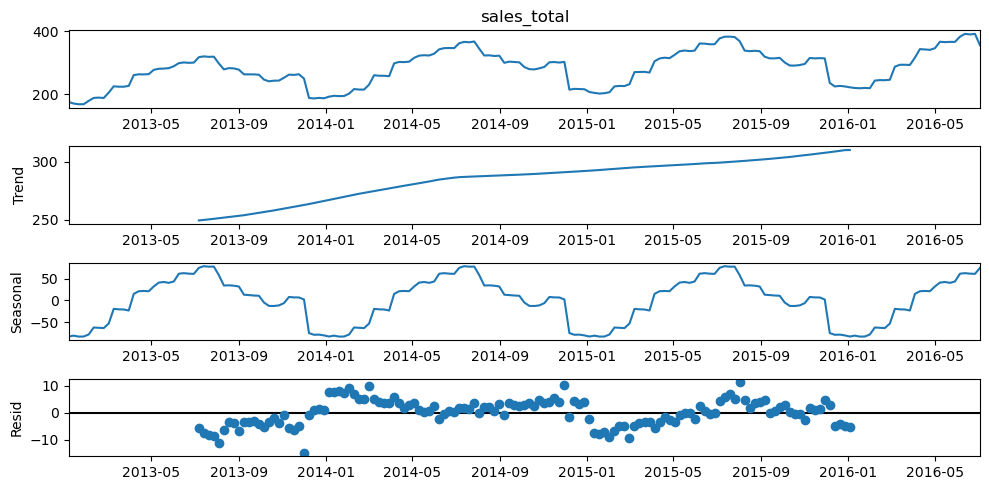

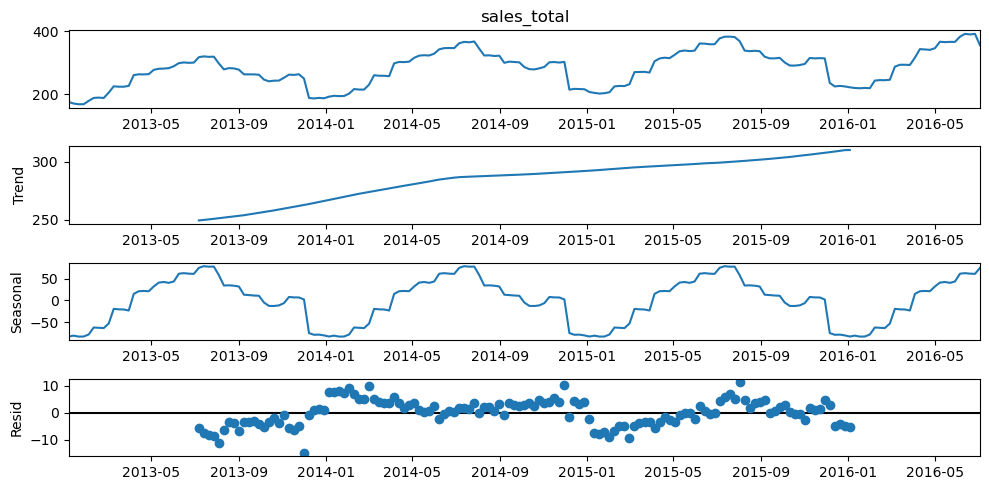

In [80]:
result.plot()

In [2]:
df = p.preprocess_opsd_data()

In [3]:
df.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012
2012-01-02,1269.581,207.327,6.574,213.901,January,2012
2012-01-03,1334.745,473.468,24.679,498.147,January,2012
2012-01-04,1347.136,499.804,14.681,514.485,January,2012
2012-01-05,1376.658,523.851,5.071,528.922,January,2012


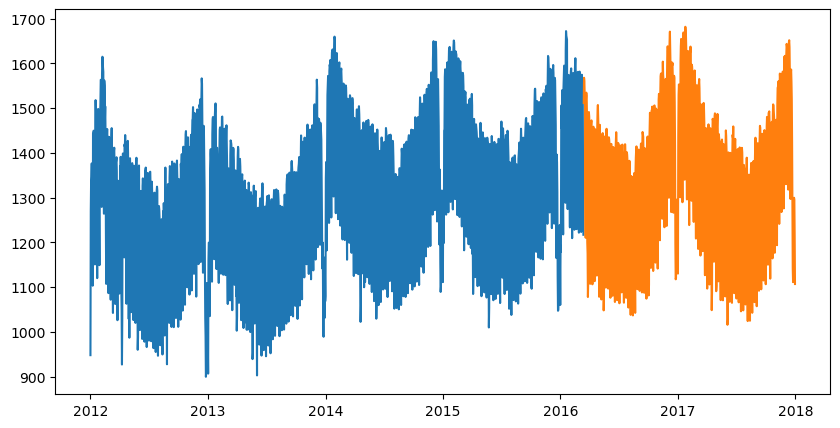

In [4]:
# split
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)


In [5]:
y = train.consumption
y.head()

date
2012-01-01     948.128
2012-01-02    1269.581
2012-01-03    1334.745
2012-01-04    1347.136
2012-01-05    1376.658
Freq: D, Name: consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

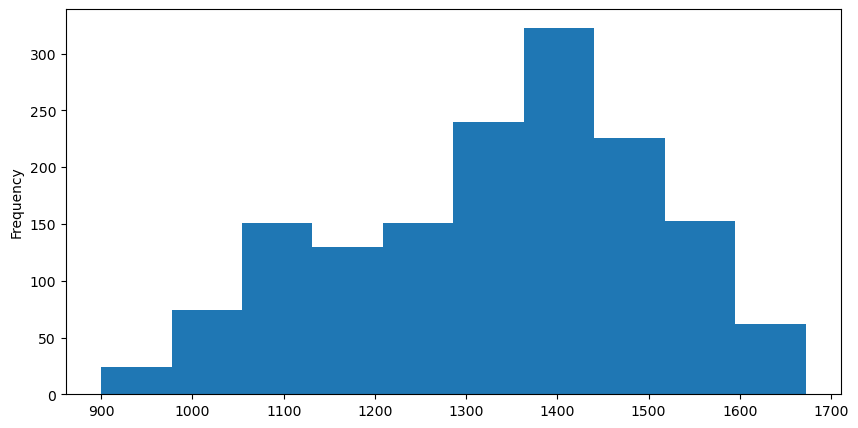

In [6]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Month'), Text(0.5, 0, 'Month')]

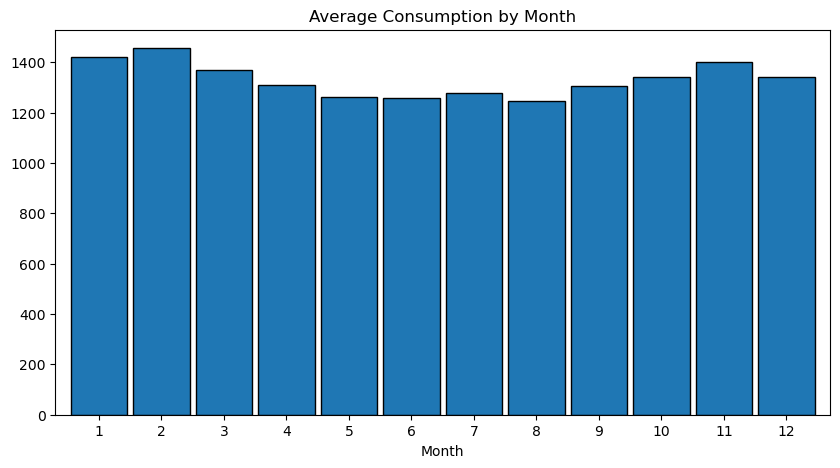

In [7]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month')


<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

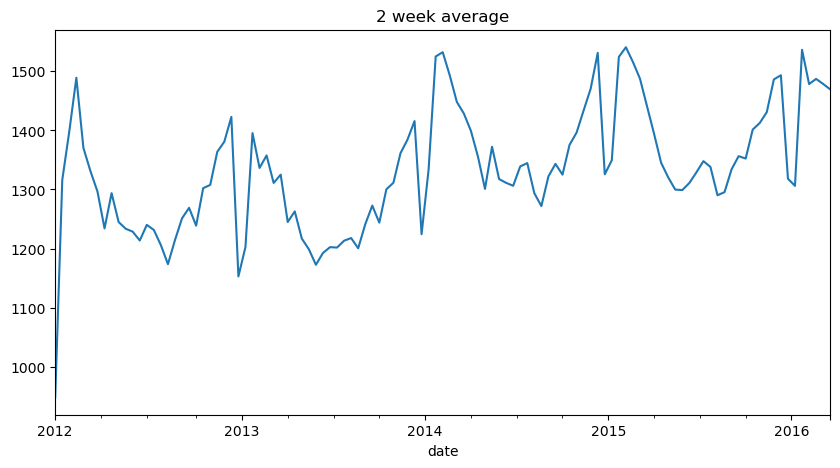

In [9]:
y.resample('2W').mean().plot(title='2 week average')

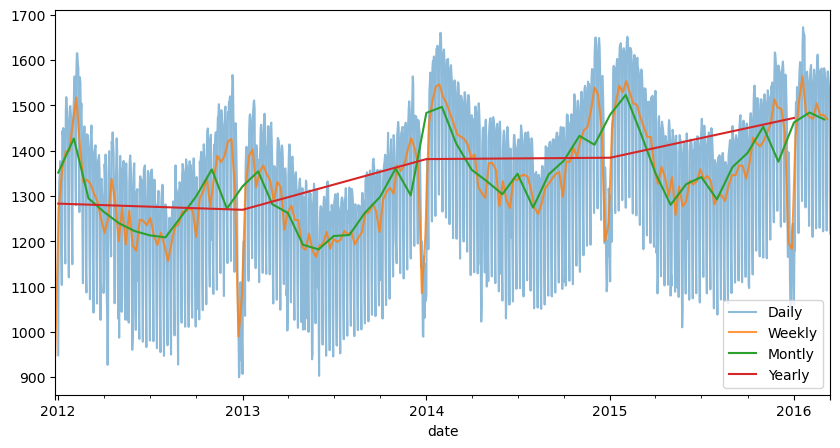

In [14]:

y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();


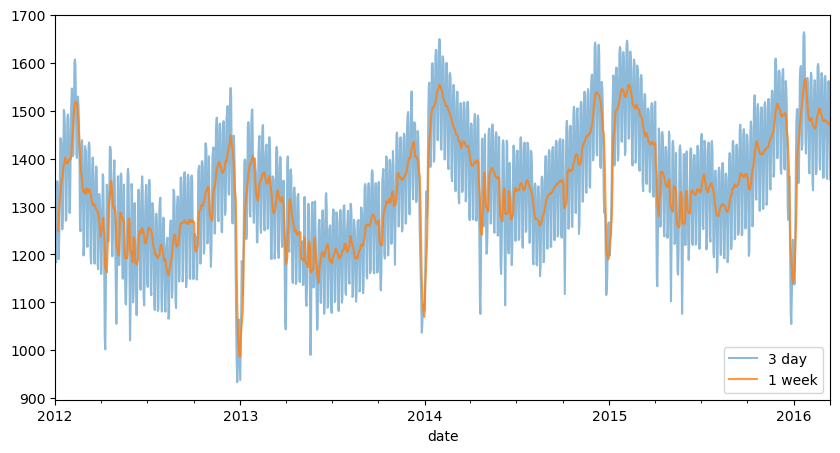

In [13]:

y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend();


<AxesSubplot:title={'center':'Average week-to-week change in consumption'}, xlabel='date'>

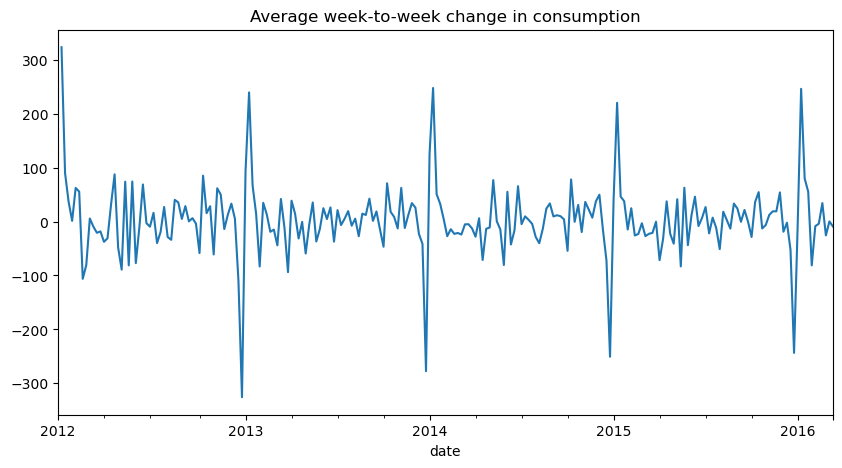

In [15]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

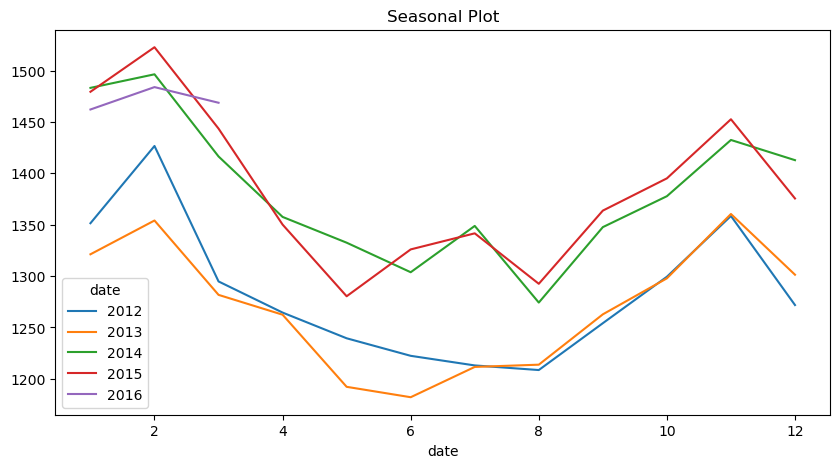

In [17]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


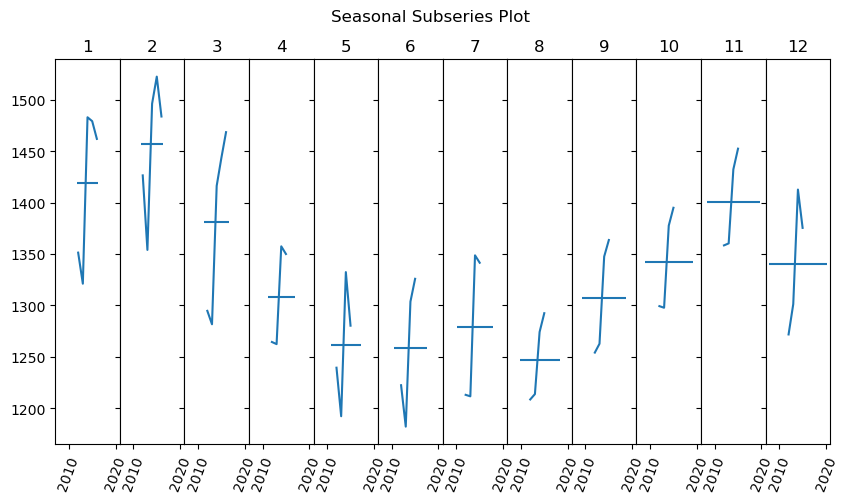

In [18]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


Text(0.5, 1.0, 'Lag plot with lag=1')

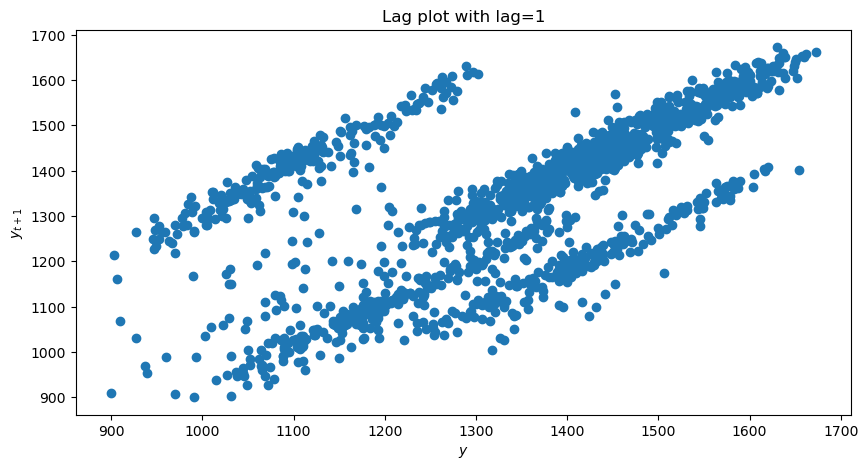

In [20]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

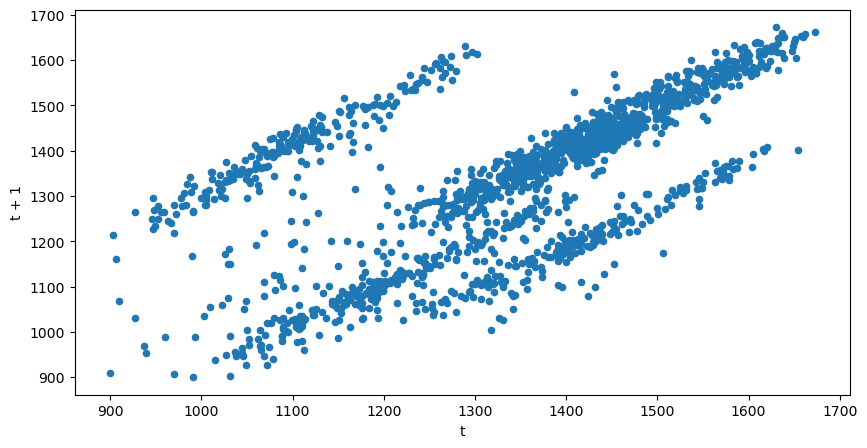

In [25]:
train['y(t + 1)'] = train.consumption.shift(-1)
ax = train.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


In [26]:
del train['y(t + 1)']


# Every Week out 

,this_week,wind,solar,wind+solar,the_next_week
date,,,,,
2012-01-01,948.128000,227.465000,6.587000,234.052000,1271.200857
2012-01-08,1271.200857,368.550571,10.960000,379.510571,1361.100714
2012-01-15,1361.100714,227.979571,19.160286,247.139857,1397.982143
2012-01-22,1397.982143,235.064286,20.390429,255.454714,1399.240429
2012-01-29,1399.240429,85.359000,17.706000,103.065000,1461.547286
...,...,...,...,...,...
2016-02-14,1470.200857,374.988857,38.660857,413.649714,1504.355857
2016-02-21,1504.355857,277.494429,36.318286,313.812714,1478.600000
2016-02-28,1478.600000,234.270000,68.814429,303.084429,1478.772571


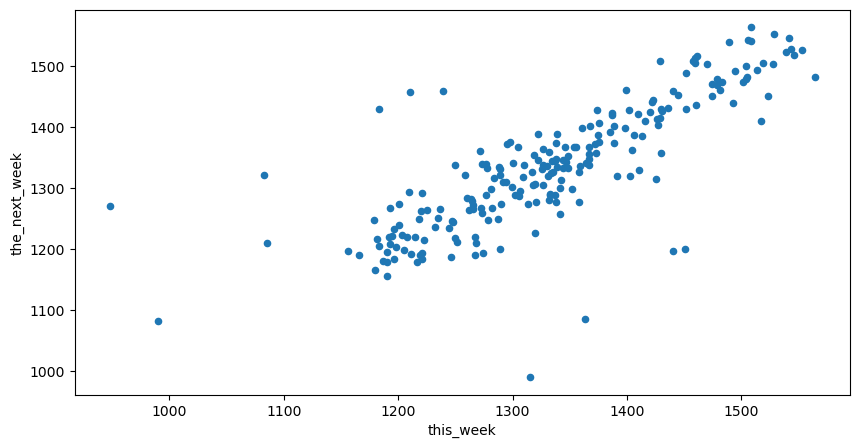

In [27]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly


# 12 weeks out 

,this_week,wind,solar,wind+solar,12_weeks_out
date,,,,,
2012-01-01,948.128000,227.465000,6.587000,234.052000,1287.170571
2012-01-08,1271.200857,368.550571,10.960000,379.510571,1249.584000
2012-01-15,1361.100714,227.979571,19.160286,247.139857,1218.495000
2012-01-22,1397.982143,235.064286,20.390429,255.454714,1250.029429
2012-01-29,1399.240429,85.359000,17.706000,103.065000,1337.468571
...,...,...,...,...,...
2016-02-14,1470.200857,374.988857,38.660857,413.649714,NaN
2016-02-21,1504.355857,277.494429,36.318286,313.812714,NaN
2016-02-28,1478.600000,234.270000,68.814429,303.084429,NaN


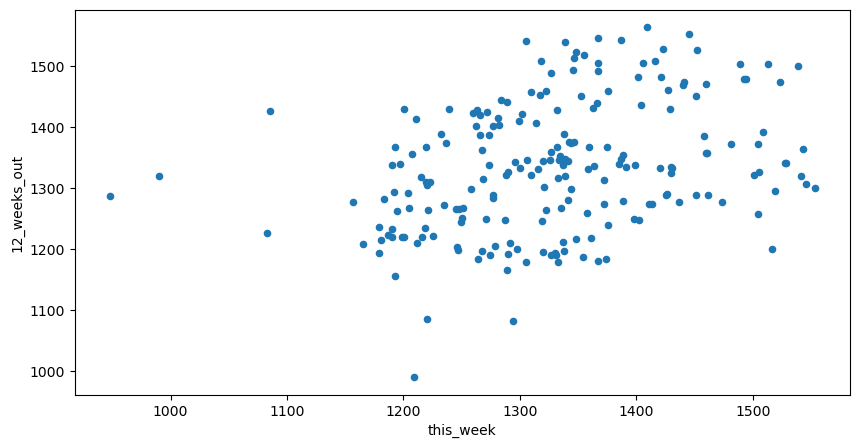

In [28]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.consumption.shift(-12)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly


# Half a year later

,this_week,wind,solar,wind+solar,half_a_year_later
date,,,,,
2012-01-01,948.128000,227.465000,6.587000,234.052000,1235.240714
2012-01-08,1271.200857,368.550571,10.960000,379.510571,1251.404857
2012-01-15,1361.100714,227.979571,19.160286,247.139857,1211.444571
2012-01-22,1397.982143,235.064286,20.390429,255.454714,1192.170571
2012-01-29,1399.240429,85.359000,17.706000,103.065000,1219.103286
...,...,...,...,...,...
2016-02-14,1470.200857,374.988857,38.660857,413.649714,NaN
2016-02-21,1504.355857,277.494429,36.318286,313.812714,NaN
2016-02-28,1478.600000,234.270000,68.814429,303.084429,NaN


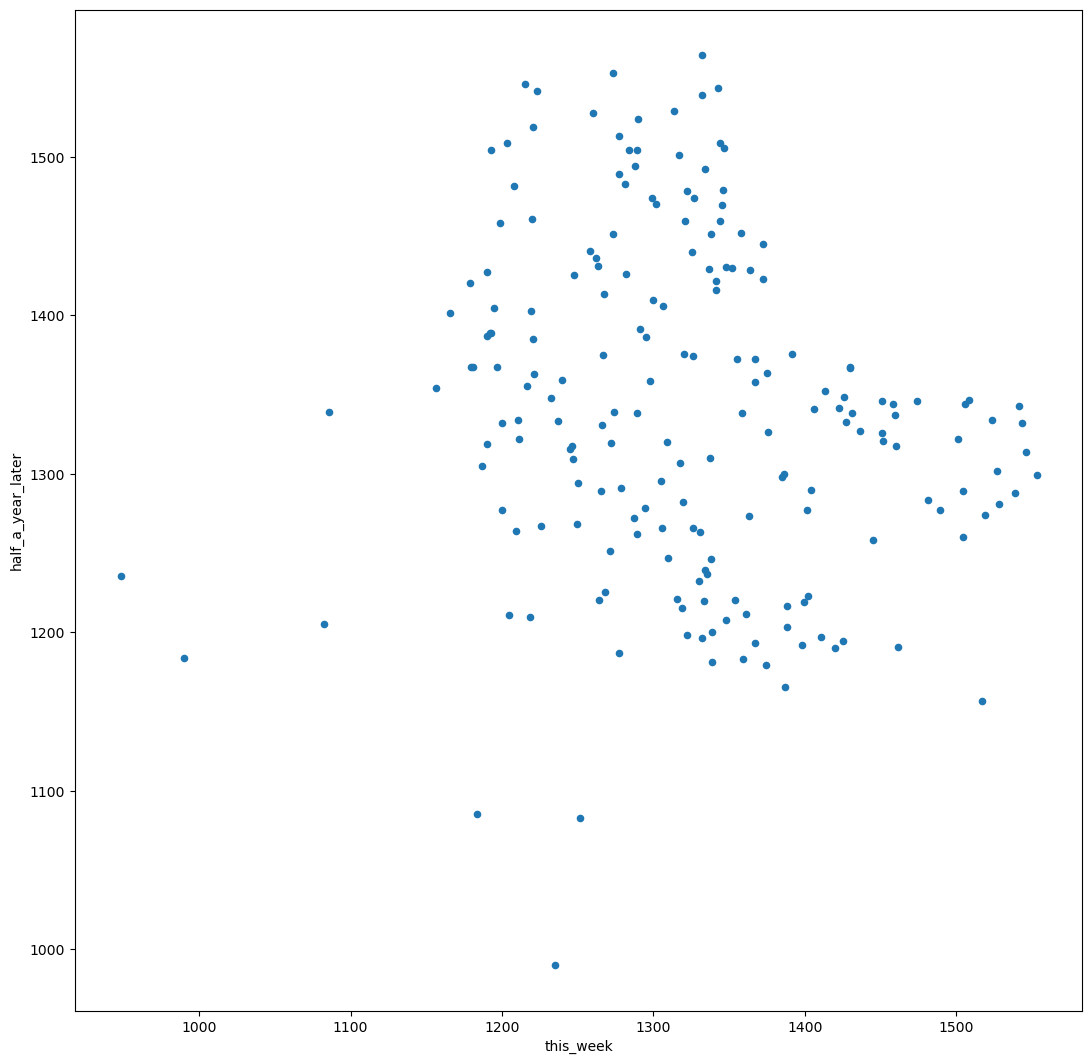

In [29]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.consumption.shift(-26)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly


# 26 weeks

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

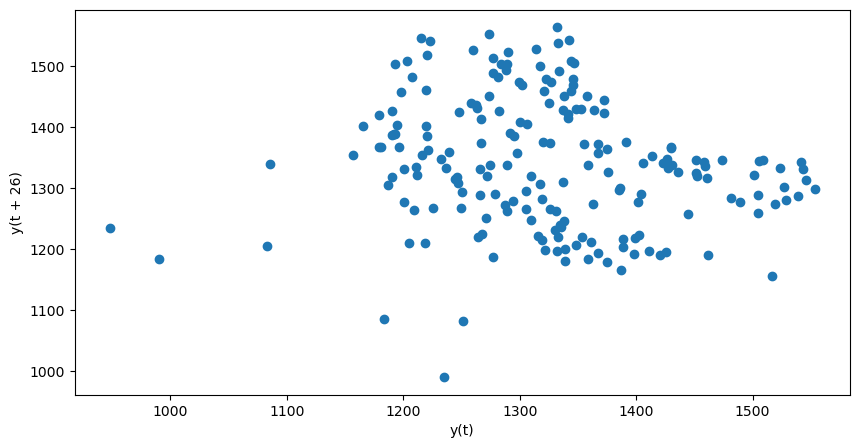

In [30]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=26)


# Autocorrelation

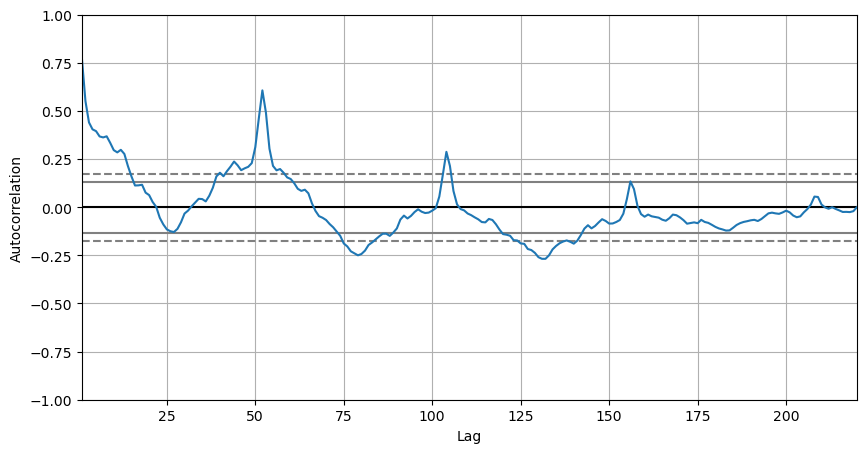

In [33]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean());


# Seasonal Decomposition

In [34]:
y = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
date,,,,
2012-01-01,948.128000,NaN,-235.583057,NaN
2012-01-08,1271.200857,NaN,-150.568723,NaN
2012-01-15,1361.100714,NaN,84.309764,NaN
2012-01-22,1397.982143,NaN,137.878105,NaN
2012-01-29,1399.240429,NaN,165.174630,NaN


# Categories over time

In [36]:
train = train.resample('D').mean()
# create a categorical feature
train['consumption_bin'] = pd.qcut(train.consumption, 4, labels=['low', 'lower_medium', 'higher_medium', 'high'])
train.groupby('consumption_bin').mean()


,consumption,wind,solar,wind+solar
consumption_bin,,,,
low,1099.925797,150.333604,93.164732,243.777641
lower_medium,1298.817016,146.734501,95.357373,242.200642
higher_medium,1411.207569,138.383736,95.679295,234.063031
high,1535.125831,197.708164,49.605609,247.288312


Text(0, 0.5, '% of days in the month')

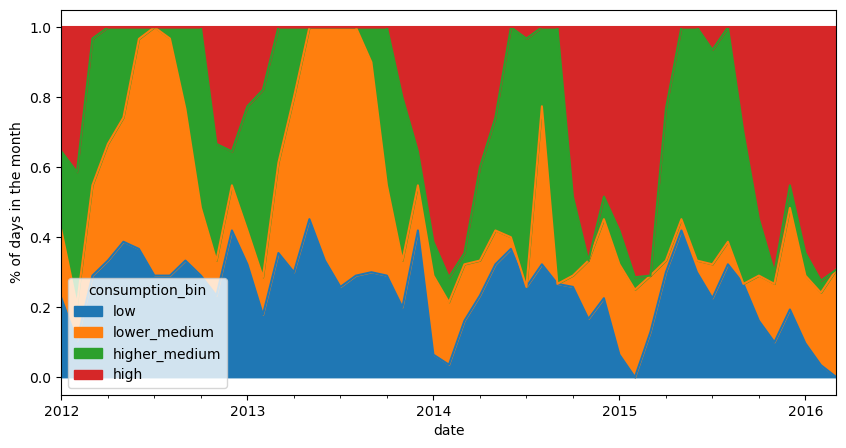

In [37]:
(train.groupby('consumption_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')
